### ***PROBLEM STATEMENT***

It is more important than ever to address food insecurity worldwide, especially in areas facing socioeconomic and environmental difficulties. The Food Security Index is an essential instrument for drawing attention to national differences and emphasises the necessity of focused measures to address root causes and mitigate negative effects. These problems are made worse by climate change, which puts food production and availability at risk from extreme weather events like heat waves, floods, and droughts. Problems are made worse by resource limitations, such as a lack of water and restricted access to technology, especially in low-resource environments. Many nations find it challenging to provide their citizens with food that is sustainable, safe, and inexpensive because of this complexity.

**Using AI to Address Food Security Challenges:**

* **Promoting Access to Nutritious Food:** AI initiatives promote access to nutritious and affordable food for all.This contributes to the development of sustainable food systems and livelihoods globally.

* **Trend Analysis and Pattern Recognition:** AI can analyze trends and patterns in food security data.This analysis helps policymakers, researchers, and practitioners identify critical areas for intervention.
* **Efficient Resource Allocation:** AI assists in prioritizing interventions and allocating resources efficiently.This ensures targeted actions to mitigate the impacts of climate change and resource limitations on food security.

* **Guiding Strategic Interventions:** AI provides insights that guide the development of effective strategies.These strategies aim to combat malnutrition, hunger, and food insecurity on a global scale.
* **Fostering Collaboration:** AI-driven solutions foster collaboration among stakeholders.Collaboration enhances the effectiveness of interventions and resource allocation.



DATA SOURCE: https://www.kaggle.com/datasets/rahuljangam/global-food-security-index


### ***STEP #1: LIBRARIES IMPORT***

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data_path = '/content/drive/MyDrive/Global Food Security Index 2022.csv'
df = pd.read_csv(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***STEP #3: DATA VISUALISATION***

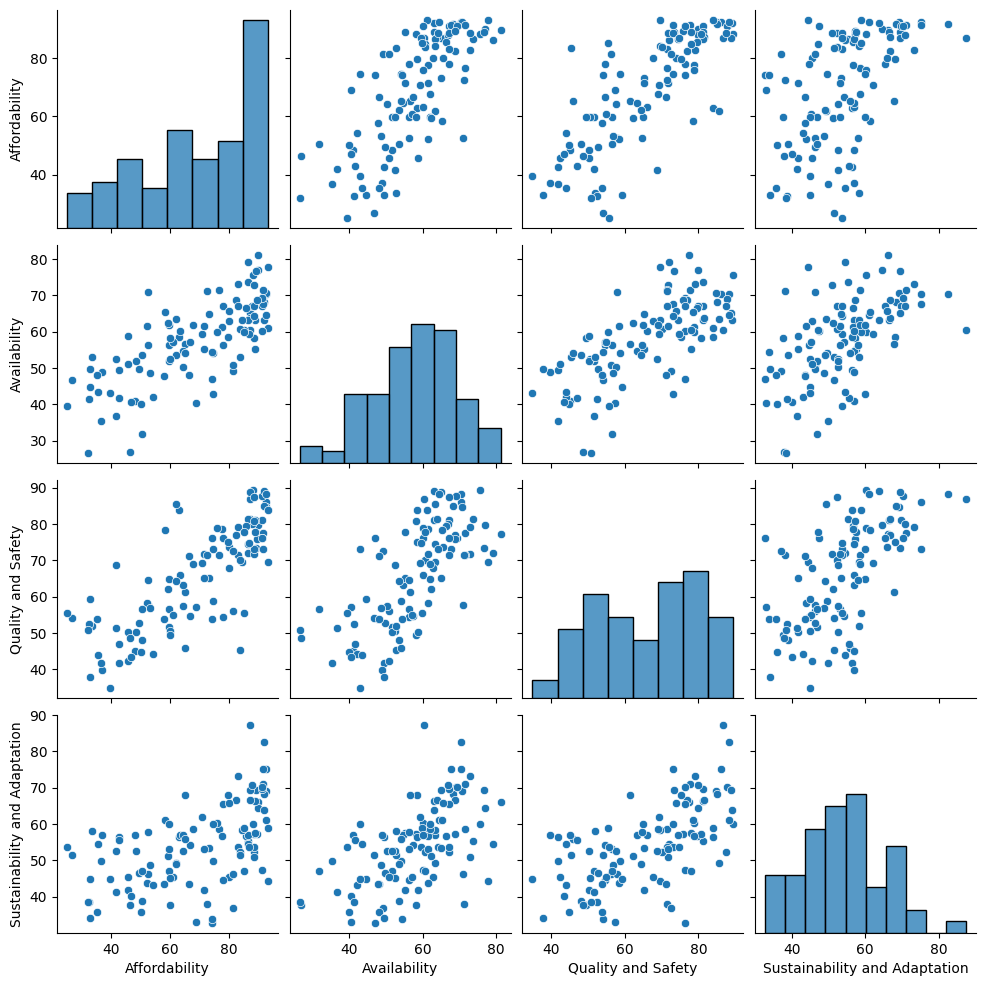

In [ ]:
# Visualize relationships between variables (e.g., scatter plots, box plots)
sns.pairplot(df[['Affordability', 'Availability', 'Quality and Safety', 'Sustainability and Adaptation']])
plt.show()


### ***STEP #2: EDA***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     113 non-null    int64  
 1   Rank                           113 non-null    object 
 2   Country                        113 non-null    object 
 3   Overall score                  113 non-null    float64
 4   Affordability                  113 non-null    float64
 5   Availability                   113 non-null    float64
 6   Quality and Safety             113 non-null    float64
 7   Sustainability and Adaptation  113 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.2+ KB
None
       Unnamed: 0  Overall score  Affordability  Availability  \
count   113.00000     113.000000     113.000000    113.000000   
mean     56.00000      62.157522      69.018584     57.784071   
std      32.76431      12.663035  

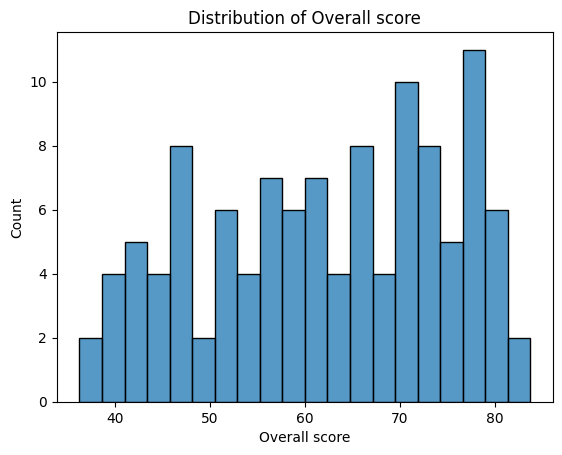

In [ ]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore distribution of the target variable (e.g., Overall score)
sns.histplot(df['Overall score'], bins=20)
plt.title('Distribution of Overall score')
plt.show()


### ***STEP #4: MODEL TRAINING***

In [ ]:
# Define score ranges and corresponding labels
score_bins = [0, 60, 70, 80, 90, 100]  # Define score bins
score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']  # Define corresponding labels

# Create categorical labels based on score ranges
df['score Category'] = pd.cut(df['Overall score'], bins=score_bins, labels=score_labels)

# Display unique score categories
print(df['score Category'].value_counts())


score Category
Poor         48
Good         34
Fair         26
Very Good     5
Excellent     0
Name: count, dtype: int64


In [ ]:
# Split data into features (X) and target (y)
X = df[['Affordability', 'Availability', 'Quality and Safety', 'Sustainability and Adaptation']]
y = df['score Category']  # Use the categorical labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### ***STEP #5: MODEL BUILDING***

In [ ]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report (optional)
print(classification_report(y_test, y_pred))


Accuracy: 0.65
              precision    recall  f1-score   support

        Fair       0.33      0.75      0.46         4
        Good       0.71      0.83      0.77         6
        Poor       1.00      0.55      0.71        11
   Very Good       1.00      0.50      0.67         2

    accuracy                           0.65        23
   macro avg       0.76      0.66      0.65        23
weighted avg       0.81      0.65      0.68        23

